In [1]:
import os

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from src.Tools import portfolio_metrics, min_cost_partition, get_qubo, plot_energy_spectrum, qubo_limits, check_qubo

In [2]:
# Number of Qubits 
N=16
# Number of excitations
k=8
# RNG seed for reproducibility
seed=1
# alpha in: s^T*mu + alpha*(s^T*Covar*s)
alpha=0.5


In [3]:
# Generating random problem instance 
expected_returns, covariances = portfolio_metrics(n=N, seed=seed)

# Retrieving C_min, C_max and corresponding states for original portfolio problem
constrained_result, full_result, lmbda = min_cost_partition(nr_qubits=N,
                                                            k=k,
                                                            mu=expected_returns,
                                                            sigma=covariances,
                                                            alpha=alpha)

portfolio_subspace_max_cost, portfolio_subspace_min_cost, portfolio_subspace_min_state = constrained_result['c_max'], constrained_result['c_min'], constrained_result['s']
full_space_max_cost = full_result['c_max']
portfolio_subspace_min_state_str = ''.join([str(_) for _ in portfolio_subspace_min_state])
print(f"Min. cost portfolio (constrained subspace): {portfolio_subspace_min_cost}")
print("Optimal portfolio state (constrained subspace) is: |"+portfolio_subspace_min_state_str+">")

Min. cost portfolio (constrained subspace): 103.06835761788096
Optimal portfolio state (constrained subspace) is: |1010001111101000>


In [4]:

# Generating QUBO corresponding to current problem instance
Q, offset = get_qubo(mu=expected_returns,
                     sigma=covariances, 
                     alpha=alpha,
                     lmbda=lmbda,
                     k=k)
QUBO_limits = qubo_limits(Q=Q,offset=offset)
qubo_min_cost, qubo_max_cost = QUBO_limits['c_min'], QUBO_limits['c_max']
qubo_min_state, qubo_max_state = QUBO_limits['min_state'], QUBO_limits['max_state']
check_qubo(QUBO_matrix=Q, QUBO_offset=offset, expected_returns=expected_returns, covariances=covariances, alpha=alpha, k=k)
qubo_min_state_str = ''.join([str(_) for _ in qubo_min_state])
print(f"Min. cost QUBO: {qubo_min_cost}")
print("Min. cost QUBO state is: |"+qubo_min_state_str+">")


Min. cost QUBO: 103.06835761788079
Min. cost QUBO state is: |1010001111101000>


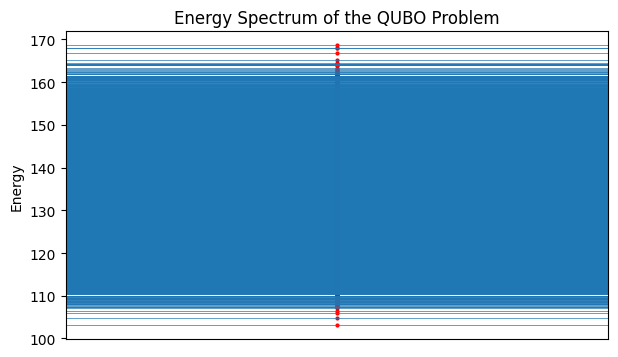

In [5]:
# Assuming plot_energy_spectrum is a function that returns a dictionary of energy levels
spectrum = plot_energy_spectrum(QUBO_matrix=Q, QUBO_offset=offset, k=k)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
energies = list(spectrum.values())
x_coords = [0] * len(energies)

# Plotting energy levels
ax.plot(x_coords, energies, 'ro', ms=2)
ax.set_xticks([])
xmin, xmax = -1, 1
ax.set_xlim(xmin, xmax)

# Adding horizontal lines for each energy level
for energy in energies:
    ax.hlines(energy, xmin, xmax, lw=0.5)

# Optional: Adding labels and title
ax.set_ylabel('Energy')
ax.set_title('Energy Spectrum of the QUBO Problem')

plt.show()

Text(0.5, 1.0, 'Histogram of Energy Levels')

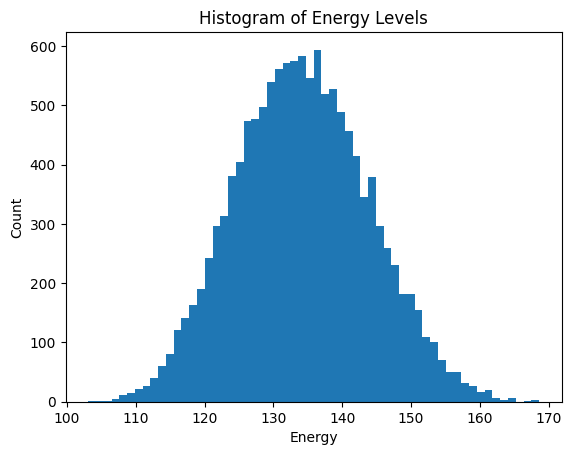

In [6]:
plt.hist(energies, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.xlabel('Energy')
plt.ylabel('Count')
plt.title('Histogram of Energy Levels')